In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
import pandas as pd
sys.path.append('/Users/luciamenendezfernandez/Desktop/TFM lucia/src/lag1_funciones')


Entrenando Linear Regression...
Linear Regression - RMSE: 0.3796530743508964
Entrenando Decision Tree...
Decision Tree - RMSE: 7.690547723145953
Entrenando Random Forest...
Random Forest - RMSE: 7.199384799121066
Entrenando Gradient Boosting...
Gradient Boosting - RMSE: 7.878778209857223
Entrenando XGBoost...
XGBoost - RMSE: 7.628802513003315
Entrenando SVR...
SVR - RMSE: 0.3940176474238121
🏆 Mejor modelo: Linear Regression con RMSE: 0.3797


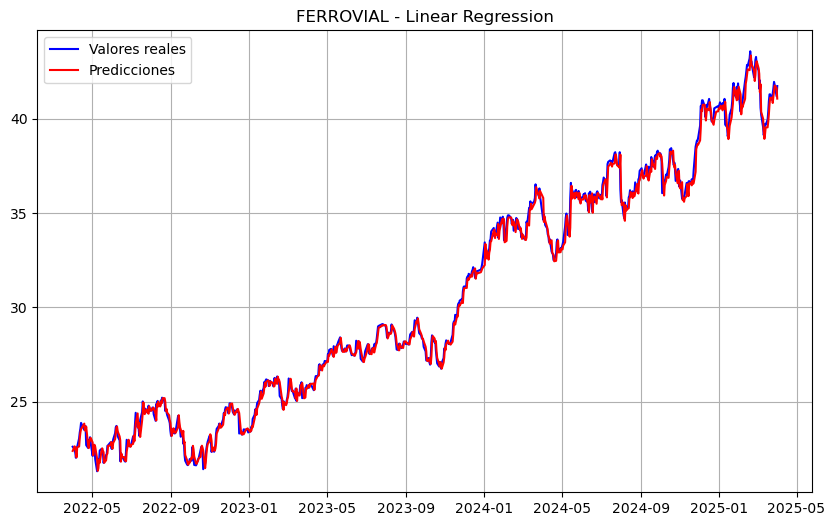

In [2]:
# --- CONFIGURACIÓN INICIAL ---
import sys
import os

from preprocessing import cargar_datos
from features import crear_variables_lag_y_temporales
from model_training import dividir_train_test, definir_modelos, entrenar_y_evaluar_modelos
from visualization import graficar_predicciones

# --- PARÁMETROS ---
empresa = "FERROVIAL"
ruta_datos = "/Users/luciamenendezfernandez/Desktop/TFM lucia/data/IBEX35_cotizaciones_20_Limpio.csv"

# --- 1. Cargar y preparar los datos ---
df = cargar_datos(ruta_datos, empresa)
df = crear_variables_lag_y_temporales(df)

# --- 2. Dividir en entrenamiento y prueba ---
fecha_corte="2022-04-01"
X_train, y_train, X_test, y_test = dividir_train_test(df, fecha_test=fecha_corte)

# --- 3. Entrenar y evaluar modelos ---
models, param_grids = definir_modelos()
best_model_name, best_model, best_rmse = entrenar_y_evaluar_modelos(
    X_train, y_train, X_test, y_test, models, param_grids
)

print(f"🏆 Mejor modelo: {best_model_name} con RMSE: {best_rmse:.4f}")

# --- 4. Predicción y visualización ---
y_pred = best_model.predict(X_test)
graficar_predicciones(y_test, y_pred, titulo=f"{empresa} - {best_model_name}")



